In [1]:
import mnist
import numpy as np
from sklearn.linear_model import SGDClassifier

In [2]:
X_train = mnist.train_images()
y_train = mnist.train_labels()

X_test = mnist.test_images()
y_test = mnist.test_labels()

print("X_train size: {}".format(X_train.shape))
print("X_test size: {}".format(X_test.shape))

print("y_train size: {}".format(y_train.shape))
print("y_test size: {}".format(y_test.shape))

y_train = y_train.reshape((y_train.shape[0],1))
y_test  = y_test.reshape((y_test.shape[0],1))

print("y_train size: {}".format(y_train.shape))
print("y_test size: {}".format(y_test.shape))



X_train size: (60000, 28, 28)
X_test size: (10000, 28, 28)
y_train size: (60000,)
y_test size: (10000,)
y_train size: (60000, 1)
y_test size: (10000, 1)


Current label: [8]


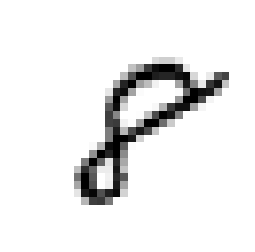

In [22]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

guess = 59999

some_digit = X_train[guess]
some_digit_image = some_digit.reshape(28,28)
print('Current label: {}'.format(y_train[guess]))


plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [18]:
shuffle_index = np.random.permutation(60000)
X_train_shuffled, y_train_shuffled = X_train[shuffle_index], y_train[shuffle_index]
y_train_5 = (y_train_shuffled == 5)

X_train_mini, y_train_mini = X_train_shuffled[0:1000,:,:], y_train_shuffled[0:1000]

X_train_mini = X_train_mini.reshape(1000, 28 * 28)

print(X_train_mini.shape)
print(y_train_mini.shape)

(1000, 784)
(1000, 1)


In [20]:
sgd_clf = SGDClassifier(random_state = 42)


sgd_clf.fit(X_train_mini, y_train_mini)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [55]:
guess_again = 7500



total_sample_size = y_test.shape[0]
predictVec = np.zeros((total_sample_size,1))
for _ in range(total_sample_size):
    predictVec[_] = sgd_clf.predict(X_test[_].reshape(1,784)) == y_test[_]

print(np.where(predictVec == 0)[0])

[   8    9   12 ... 9986 9992 9998]
